In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [165]:
data = pd.read_csv('/content/drive/MyDrive/Pashto/pashto_alpha_num_hw.csv')
data

,alif,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.988,0.989,0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997
0,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,183
2,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37864,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37865,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37866,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37867,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
data.shape

(37869, 1025)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Columns: 1025 entries, alif to 0.997
dtypes: int64(1024), object(1)
memory usage: 296.1+ MB


In [168]:
data['alif'].unique()

array(['alif', 'be', 'pe', 'te', 'ṭe', 'se', 'jīm', 'če', 'he', 'xe',
       'ce', 'źim', 'dāl', 'ḍāl', 'zāl', 're', 'ṛe', 'ze', 'že', 'ẓ̌ey',
       'sīn', 'šīn', 'x̌īn', 'swād', 'zwād', 'twe', 'zwe', 'ayn', 'ğayn',
       'fe', 'qāf', 'kāf', 'gāf', 'lām', 'mīm', 'nūn', 'ṇūn', 'wāw',
       'gərda he', 'klaka ye', 'pasta ye', 'nārīna ye', 'x̌əźīna ye',
       'fāiliya ye', 'yaw', 'dwa', 'dre', 'celor', 'pinza', 'shpazh',
       'owa', 'ata', 'nah', 'las'], dtype=object)

In [169]:
#Removing Labels from the dataset and stoing it in y
y = data['alif']
del data['alif']

In [170]:
label_encoder = LabelEncoder()
encodeLabels = label_encoder.fit_transform(y)
encodeLabels

array([ 0,  0,  0, ..., 17, 17, 17])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


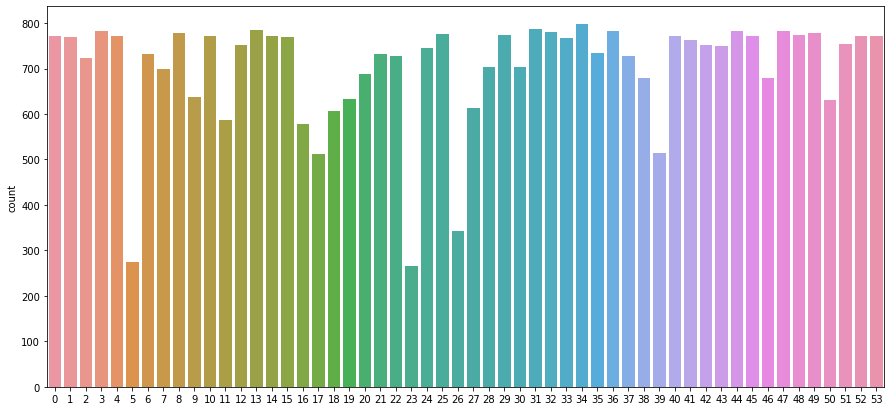

In [171]:

#Looking for imbalances in data
plt.figure(figsize = (15, 7))
sns.countplot(encodeLabels)

In [172]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(data, encodeLabels)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


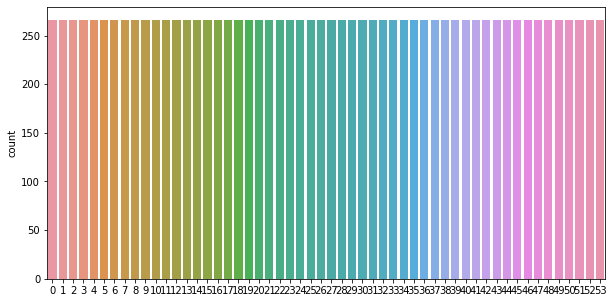

In [173]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

In [174]:
from keras.utils import np_utils
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

54

In [175]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [176]:
y.shape , X_data.shape

((14364, 54), (14364, 1024))

Normalizing the data

In [177]:
X_data = X_data / 255
X_data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.988,0.989,0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualizing some of the data

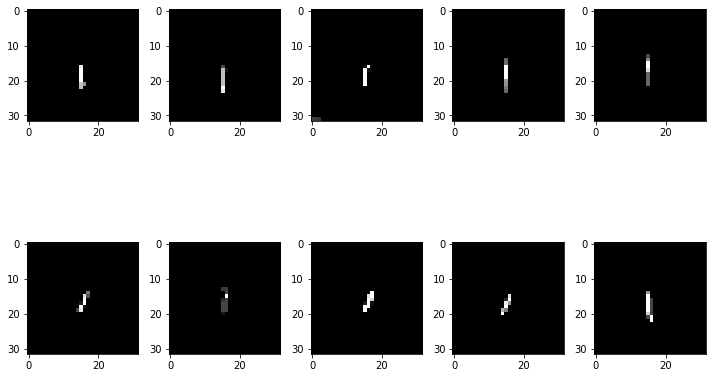

In [178]:
X_data = np.array(X_data)
X_data = X_data.reshape(-1,32,32,1)
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(32,32), cmap='gray')
        k += 1
    plt.tight_layout()


Train Test Split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.25 ,random_state=102)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10773, 32, 32, 1), (3591, 32, 32, 1), (10773, 54), (3591, 54))

Building Model

In [191]:
optimizer = Adam(lr=0.0001)
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), input_shape=(32, 32, 1), activation='relu', padding="same"))
model2.add(Conv2D(64, (7, 7), input_shape=(32, 32, 1), activation='relu',padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.2))

model2.add(Conv2D(128, (5, 5), input_shape=(32, 32), activation='relu', padding="same"))
model2.add(Conv2D(128, (5, 5), input_shape=(32, 32), activation='relu',padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.2))

model2.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])
print(model2.summary())

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 32, 32, 64)        3200      
                                                                 
 conv2d_95 (Conv2D)          (None, 32, 32, 64)        200768    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 16, 16, 128)       204928    
                                                                 
 conv2d_97 (Conv2D)          (None, 16, 16, 128)       409728    
                                                     

In [192]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=2)

Epoch 1/30
337/337 - 6s - loss: 3.2360 - accuracy: 0.1320 - val_loss: 2.0964 - val_accuracy: 0.3489 - 6s/epoch - 18ms/step
Epoch 2/30
337/337 - 5s - loss: 1.7040 - accuracy: 0.4516 - val_loss: 1.3254 - val_accuracy: 0.5564 - 5s/epoch - 15ms/step
Epoch 3/30
337/337 - 5s - loss: 1.2036 - accuracy: 0.5956 - val_loss: 1.0276 - val_accuracy: 0.6505 - 5s/epoch - 15ms/step
Epoch 4/30
337/337 - 5s - loss: 0.9596 - accuracy: 0.6739 - val_loss: 0.9099 - val_accuracy: 0.6778 - 5s/epoch - 15ms/step
Epoch 5/30
337/337 - 5s - loss: 0.8072 - accuracy: 0.7303 - val_loss: 0.7875 - val_accuracy: 0.7310 - 5s/epoch - 15ms/step
Epoch 6/30
337/337 - 5s - loss: 0.6957 - accuracy: 0.7649 - val_loss: 0.7073 - val_accuracy: 0.7658 - 5s/epoch - 16ms/step
Epoch 7/30
337/337 - 5s - loss: 0.6061 - accuracy: 0.7947 - val_loss: 0.6642 - val_accuracy: 0.7786 - 5s/epoch - 16ms/step
Epoch 8/30
337/337 - 5s - loss: 0.5455 - accuracy: 0.8193 - val_loss: 0.6192 - val_accuracy: 0.7859 - 5s/epoch - 16ms/step
Epoch 9/30
337/3

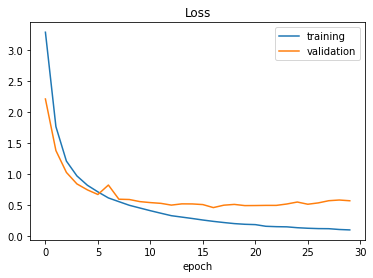

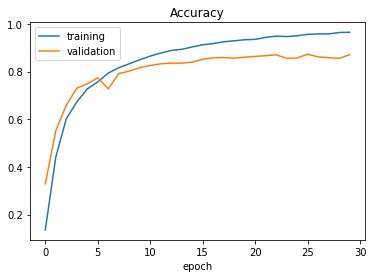

In [184]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [185]:
# Final evaluation of the model
scores = model2.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 12.92%


In [186]:
model2.save('/content/drive/MyDrive/Pashto/my_model')

In [188]:
model2.save('/content/drive/MyDrive/Pashto/my_model.h5')